<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/gu%C3%ADa_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from typing import Optional, Tuple
import time

Ejercicio 1

Demostrar las siguientes formulas para las normas inducidas sobre las matrices
A ∈ R
n×n a partir de las correspondientes normas en los vectores
a) Por la norma infinito en los vectores:
$$ \|A\|_{\infty} = \max_{1 \leq i \leq n} \sum_{j=1}^{n} |a_{ij}| $$

b) Por la norma 1 en los vectores:
$$ \|A\|_{1} = \max_{1 \leq j \leq n} \sum_{i=1}^{n} |a_{ij}| $$

c) Escriba funciones en Python para calcular estas normas

```



In [ ]:
#1c
def norma_infinito(A):
   M = np.shape(A)
   tamaño_filas = M[0]
   sumas = []
   for i in range(tamaño_filas):
       sumas.append(sum(abs(A[i,:])))
   return np.max(sumas)
A = np.array ([[1,  2,  3], [4,  5,  6],[7, 8, 9]])
print(norma_infinito(A))

def norma_uno(A):
    N = np.shape(A)
    tamaño_columnas = N[1]
    suma = []
    for i in range(tamaño_columnas):
        suma.append(sum(abs(A[:,i])))
    return np.max(suma)
print(norma_uno(A))


24
18


Ejercicio 3.

Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{3 \times 3}$ como el máximo del valor $\frac{\|Ax\|_2}{\|x\|_2}$ entre varios vectores $x \in \mathbb{R}^3$ no nulos generados al azar. Hacer un programa que reciba una matriz $A$ y luego:


a) Genere los primeros 100 términos de la siguiente sucesión:
    $ s_1 = 0, \quad s_{k+1} = \max\{ s_k, \frac{\|Ax_k\|_2}{\|x_k\|_2} \} $
    donde los $x_k \in \mathbb{R}^3$ son vectores no nulos generados al azar distribuidos uniformemente en el círculo unitario.
    
b) Grafique la sucesión calculada, junto con el valor exacto de la norma de la matriz.


Vectores generados en la esfera unitaria:
Vector 1: [-0.93423093 -0.03602309  0.35484491]
Vector 2: [ 0.21683766 -0.43411769 -0.87437021]
Vector 3: [0.07139814 0.98951183 0.12557329]
Vector 4: [-0.43251054 -0.15171947 -0.88877209]
Vector 5: [0.0180552  0.79119543 0.61129682]
Vector 6: [ 0.66694718  0.39823439 -0.62975458]
Vector 7: [ 0.19623791 -0.71336185  0.67275966]
Vector 8: [-0.97859656 -0.00209028  0.20577756]
Vector 9: [-0.87110294 -0.23794481  0.42960672]
Vector 10: [ 0.77119982 -0.60568011 -0.19596538]
Vector 11: [-0.13627843  0.64161129 -0.75482656]
Vector 12: [-0.25949947 -0.3177929   0.91195817]
Vector 13: [ 0.9084227  -0.07874683  0.41056929]
Vector 14: [-0.74193795  0.60078636  0.29763035]
Vector 15: [-0.49950949  0.39227997 -0.7724032 ]
Vector 16: [ 0.70217005 -0.63443378  0.32318879]
Vector 17: [0.10357789 0.155744   0.98235199]
Vector 18: [ 0.11301358 -0.99352251  0.01187234]
Vector 19: [ 0.2605838  -0.74042107 -0.61957463]
Vector 20: [-0.76792469 -0.55862403 -0.313418

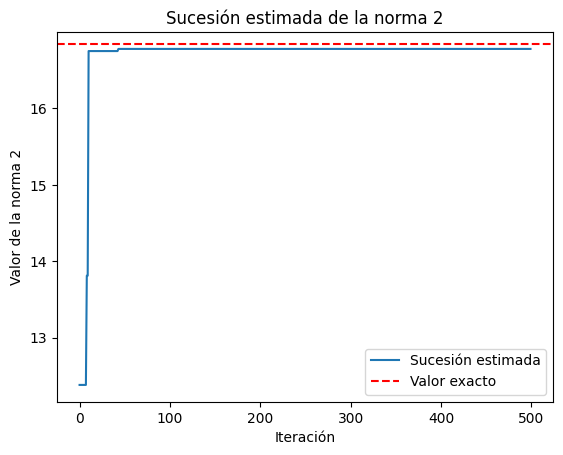

In [ ]:
def generar_vectores_unitarios(N):
    # Genera N vectores aleatorios en la esfera unitaria
    vectores = []
    for _ in range(N):
        theta = np.random.uniform(0, 2 * np.pi)
        phi = np.arccos(2 * np.random.uniform(0, 1) - 1)
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        vector = np.array([x, y, z])
        vectores.append(vector)
    return vectores

# Número de vectores a generar
N = 100

# Generar N vectores aleatorios en la esfera unitaria
vectores_generados = generar_vectores_unitarios(N)

# Imprimir los vectores generados
print("Vectores generados en la esfera unitaria:")
for i, vector in enumerate(vectores_generados):
    print(f"Vector {i + 1}: {vector}")

def norma_dos(A,x):
    Ax = np.dot(A,x)
    norma_Ax = np.linalg.norm(Ax)
    norma_x = np.linalg.norm(x)
    return norma_Ax/norma_x

def estimar_norma_2(A, iteraciones,N):
    s = 0
    max_valor = []
    for i in range(iteraciones):
        x = generar_vectores_unitarios(N)
        for vector in x:
            valor = norma_dos(A, vector)
            s = max(s, valor)
            max_valor.append(s)
    return max_valor

sucesion = estimar_norma_2(A, 5, 100)

#vamos a compararla con la solucion de verdad
valor_exacto = np.linalg.norm(A, ord=2)
plt.plot(range(len(sucesion)), sucesion, label='Sucesión estimada')
plt.axhline(y=valor_exacto, color='r', linestyle='--', label='Valor exacto')
plt.xlabel('Iteración')
plt.ylabel('Valor de la norma 2')
plt.title('Sucesión estimada de la norma 2')
plt.legend()
plt.show()


Ejercicio 11. a) Escribir un programa que resuelva un sistema $Ax = b$, $A \in \mathbb{R}^{n \times n}$ usando eliminación gaussiana sin pivoteo.

b) Adaptar el programa del ítem anterior para que calcule la matriz $A^{-1}$.

In [ ]:
def resolver_sistema_triangular(U: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Resuelve un sistema de la forma Ux = b donde U es una matrix triangular superior (a_ij = 0 si i<j)'''
    N = U.shape[0]
    x = np.empty(N)

    # Voy resolviendo de atras para adelante
    ## El primero es obvio
    x[-1] = b[-1]/U[-1,-1]

    ## Hago el resto
    for i in range(2,N+1):
        x[-i]= (b[-i] - np.dot(U[-i,-i+1:],x[-i+1:])) / U[-i, -i]
    return(x)
def gauss(A: np.ndarray, b: np.ndarray):
    ''' Resuelve un sistema Ax=b via eliminación de Gauss'''
    N = len(A)
    for i in range(N-1): #Columnas
        #Acá habría que agregar el pivoteo en caso de ser necesario (ignorelo por ahora)
        for j in range(i+1,N): #Filas
            factor = A[j, i] / A[i, i]
            A[j,i] = A[j,i] - factor*A[i,i]
            b[j] -= factor * b[i]

    x = resolver_sistema_triangular(A, b)
    return x
